<a href="https://colab.research.google.com/github/Christina-Joseph/Task-1--Supervised-Machine-Learning/blob/main/Task_1_Supervised_Learning_GRIPMAY21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

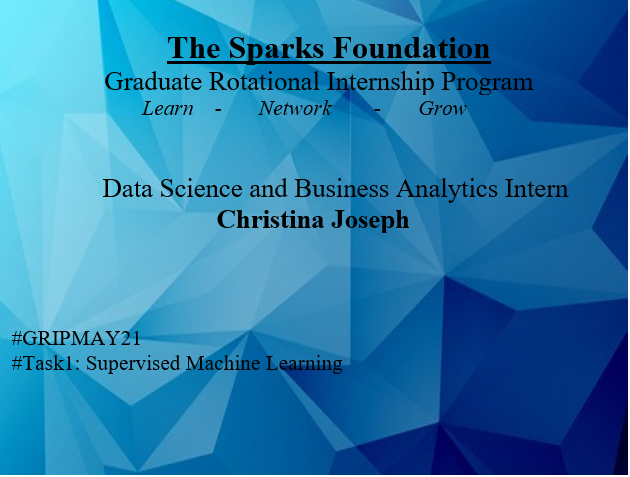

# **GRIP: THE SPARKS FOUNDATION**
# **Author: Christina Joseph**
__Data Science and Business Analytics Intern__ 

# **Task 1: Prediction using Supervised Machine Learning**
__Problem Statement:__

In this task, we need to predict the percentage score of a student based on the number of hours studied by using the Linear Regression supervised machine learning algorithm. This tasks consists of just two variables where the feature is the number of hours studied and the target value is the percentage score.This is a simple Linear Regression task

__Data Description:__

The given Dataset consists of two continuous variables i.e number of study hours and the marks scored by an individual.

__Linear Regression with Python Scikit Learn:__

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.



#Step 1: Importing the Dataset

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Reading the data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Data Successfully imported')

Data Successfully imported


In [ ]:
#returns first few rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#dimensions of the dataframe
df.shape

(25, 2)

In [ ]:
#statistical description of the dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#Step 2: Visualizing the dataset

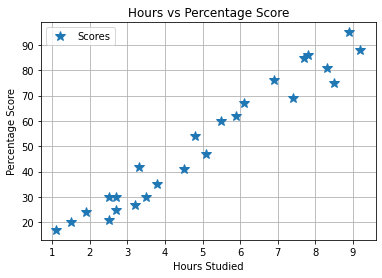

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*', markersize=10)  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid() 
plt.show()

The specified graph demonstrates a positive linear relation between the number of hours studied and percentage of score.

In [ ]:
#to determine the correlation between the two variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It is clearly visible that there is a positive correlation between these two variables.

#Step 3: Data Preparation

In this particular step, we will divide the data into 'feature'(input) and 'target'(output) as mentioned here as x and y respectively.

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#Step 4: Splitting the data into train set and the test set

After preparing the data, we need to split the whole dataset into two parts- training and testing set

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=0)

#Step 5: Implementing Linear Regression

As we have split our data into training and testing sets,and now is finally the time to train our algorithm. 

In [ ]:
#importing Linear Regression 
from sklearn.linear_model import LinearRegression as LR
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

print("Training complete.")

Training complete.


Parameters of Linear Regression

In [ ]:
m=lr.coef_
c=lr.intercept_

so here, m= determines the slope of the line and c= determines the intercept of the line

#Step 6: Visulaizing the model

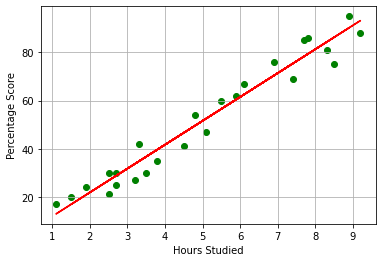

In [ ]:
line=m*x+c
plt.scatter(x, y, color='green')
plt.plot(x, line, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [ ]:
print("Training Score: ",lr.score(train_x,train_y)*100)

Training Score:  95.15510725211553


#Step 7: Making Predictions

Now that we have trained our algorithm, it's time to make some predictions

In [ ]:
y_pred = lr.predict(test_x) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing actual data and predicted data

In [ ]:
df = pd.DataFrame({'Actual': test_y, 'predicted':y_pred,'Error':test_y-y_pred})
df

,Actual,predicted,Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


#Step 8: Model Evaluation

There are 3 main metrics for model evaluation in regression:
1. Mean Absolute Error(MAE)
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. R Square/Adjusted R Square

In [ ]:
#importing evaluation metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#mean_absolute_error
print("Mean absolute error: ", mae(test_y,y_pred))

Mean absolute error:  4.183859899002982


In [ ]:
#mean_squared_error
print("Mean squared error: ", mse(test_y,y_pred))

Mean squared error:  21.598769307217456


In [ ]:
#root_mean_squared_error
print("Root Mean Squared Error: ",mse(test_y,y_pred,squared=False))

Root Mean Squared Error:  4.647447612100373


In [ ]:
#r2_score
print("r2_score: ",r2_score(test_y,y_pred))

r2_score:  0.9454906892105354


#What would be the predicted score if the student studies for 9.25 hours/day?

In [ ]:
hours = [[9.25]]
pred = lr.predict(hours)
print("Predicted Score if the student studies for 9.25 hours/day = {}".format(pred[0]))

Predicted Score if the student studies for 9.25 hours/day = 93.69173248737539


                                                       ****************